<a href="https://colab.research.google.com/github/ChallaMounika10/oasis-infotech-task-1/blob/main/EDA_on_Retail_Sales_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
# Load dataset
file_path = '/content/mock_kaggle.csv'
data = pd.read_csv(file_path)

In [ ]:
# Display basic information about the dataset
print("Dataset Info:")
print(data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     937 non-null    object 
 1   venda    937 non-null    int64  
 2   estoque  937 non-null    int64  
 3   preco    937 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 29.4+ KB
None


In [ ]:
print("\nColumn Names:")
print(data.columns)


Column Names:
Index(['data', 'venda', 'estoque', 'preco'], dtype='object')


In [ ]:
print("\nFirst Few Rows of the Dataset:")
print(data.head())


First Few Rows of the Dataset:
         data  venda  estoque  preco
0  2014-01-01      0     4972   1.29
1  2014-01-02     70     4902   1.29
2  2014-01-03     59     4843   1.29
3  2014-01-04     93     4750   1.29
4  2014-01-05     96     4654   1.29


In [ ]:
# Data Cleaning
# Convert 'data' column to datetime format
data['data'] = pd.to_datetime(data['data'], format='%Y-%m-%d')  # Adjust the format as needed

In [ ]:
# Check for and handle missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
data       0
venda      0
estoque    0
preco      0
dtype: int64


In [ ]:
# Descriptive Statistics
print("\nDescriptive Statistics:")
print(data.describe(include='all'))


Descriptive Statistics:
                                data       venda      estoque       preco
count                            937  937.000000   937.000000  937.000000
mean   2015-04-19 12:23:49.242262528   90.533618  1608.258271    1.592572
min              2014-01-01 00:00:00    0.000000     0.000000    0.000000
25%              2014-08-29 00:00:00   33.000000   794.000000    1.290000
50%              2015-04-20 00:00:00   76.000000  1348.000000    1.390000
75%              2015-12-10 00:00:00  127.000000  1964.000000    1.890000
max              2016-07-31 00:00:00  542.000000  7228.000000    2.980000
std                              NaN   80.682089  1356.691877    0.529502


In [ ]:
# Time Series Analysis
# Set 'data' as index
data.set_index('data', inplace=True)

In [ ]:
# Resample data by month and calculate monthly sales
monthly_sales = data['venda'].resample('M').sum()

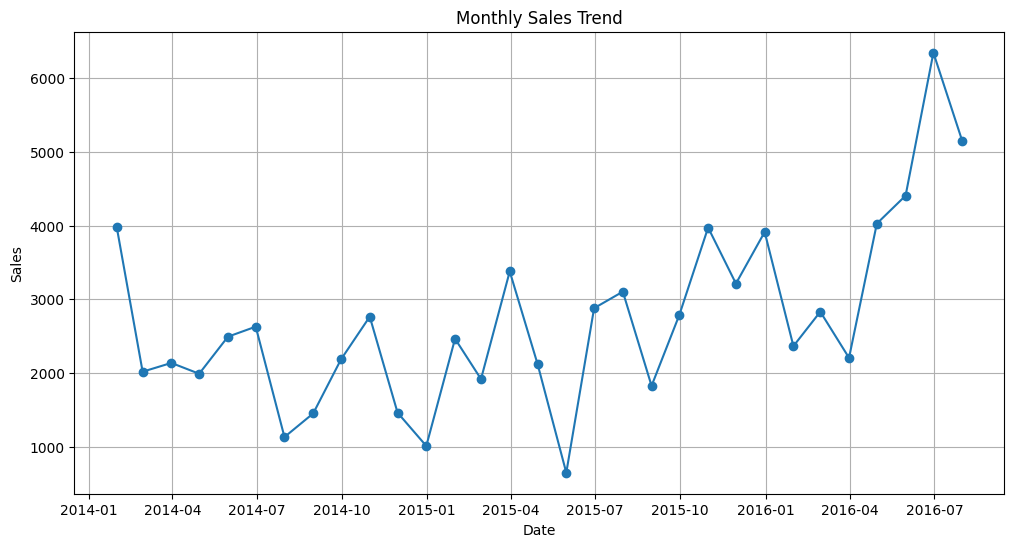

In [ ]:
# Plot monthly sales trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales, marker='o', linestyle='-')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

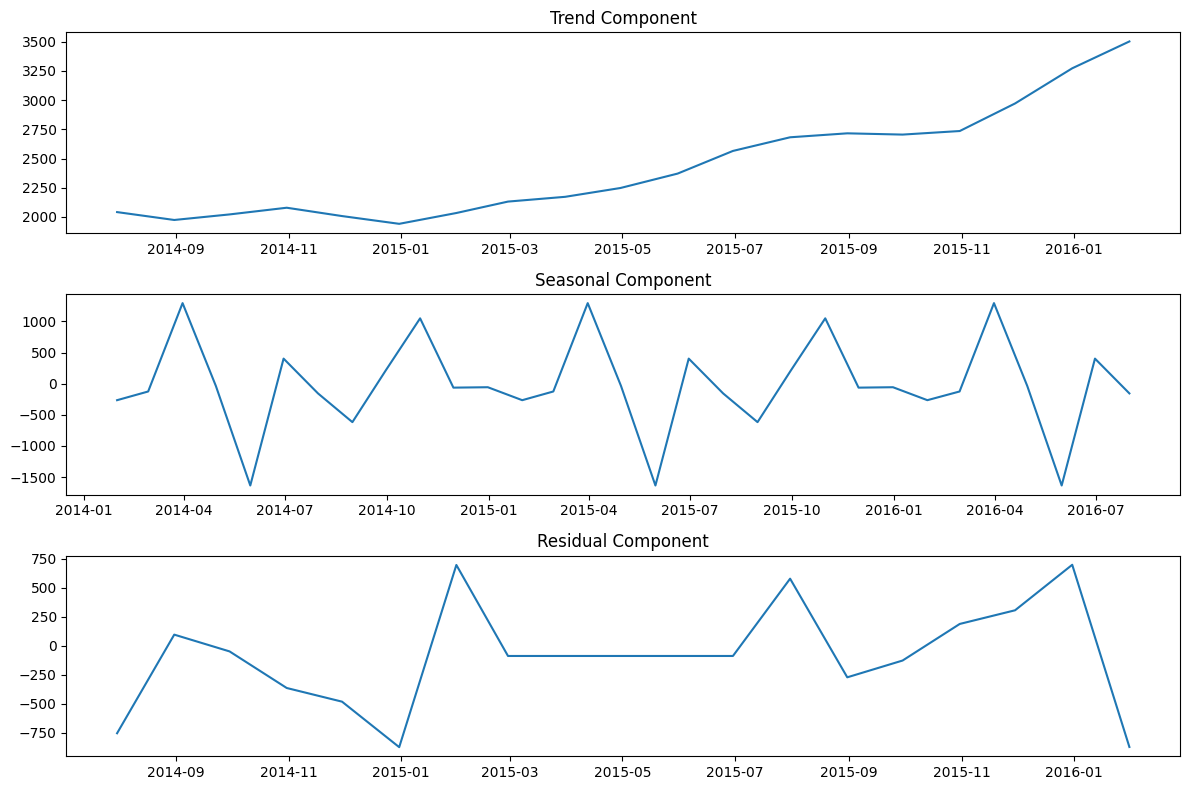

In [ ]:
# Time Series Decomposition
decomposition = seasonal_decompose(monthly_sales, model='additive')
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(decomposition.trend)
plt.title('Trend Component')
plt.subplot(3, 1, 2)
plt.plot(decomposition.seasonal)
plt.title('Seasonal Component')
plt.subplot(3, 1, 3)
plt.plot(decomposition.resid)
plt.title('Residual Component')
plt.tight_layout()
plt.show()

In [ ]:
# Forecasting with Holt-Winters Exponential Smoothing
model = ExponentialSmoothing(monthly_sales, trend='add', seasonal='add', seasonal_periods=12)
fit = model.fit()
forecast = fit.forecast(steps=3)

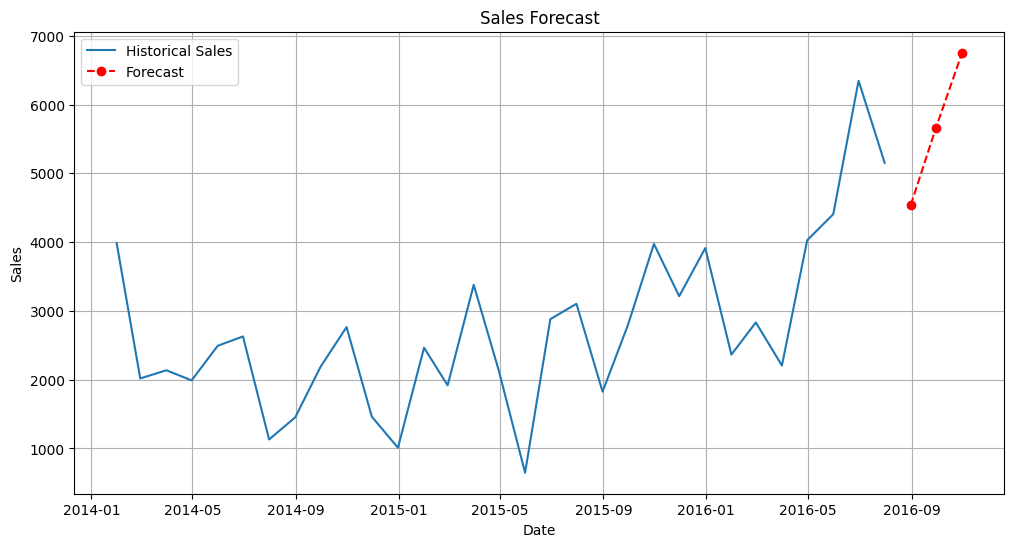

In [ ]:
# Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales, label='Historical Sales')
plt.plot(pd.date_range(start=monthly_sales.index[-1] + pd.DateOffset(months=1), periods=3, freq='M'), forecast, marker='o', linestyle='--', color='red', label='Forecast')
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Sales by Inventory
inventory_sales = data.groupby('estoque')['venda'].sum().sort_values()

In [ ]:
# Sales by Price
price_sales = data.groupby('preco')['venda'].sum().sort_values()

<ipython-input-24-22bdbb79ad59>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_sales.index, y=price_sales.values, palette='plasma')


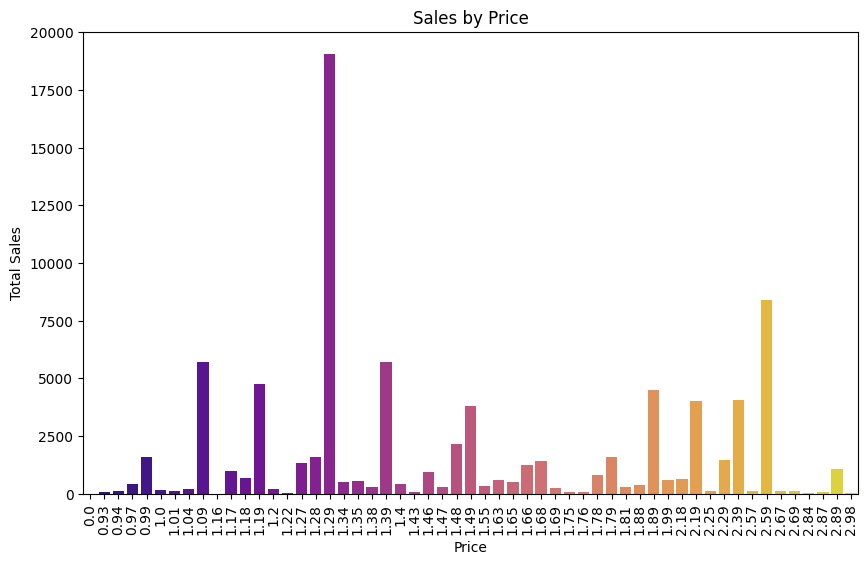

In [ ]:
# Plot sales by Price
plt.figure(figsize=(10, 6))
sns.barplot(x=price_sales.index, y=price_sales.values, palette='plasma')
plt.title('Sales by Price')
plt.xlabel('Price')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

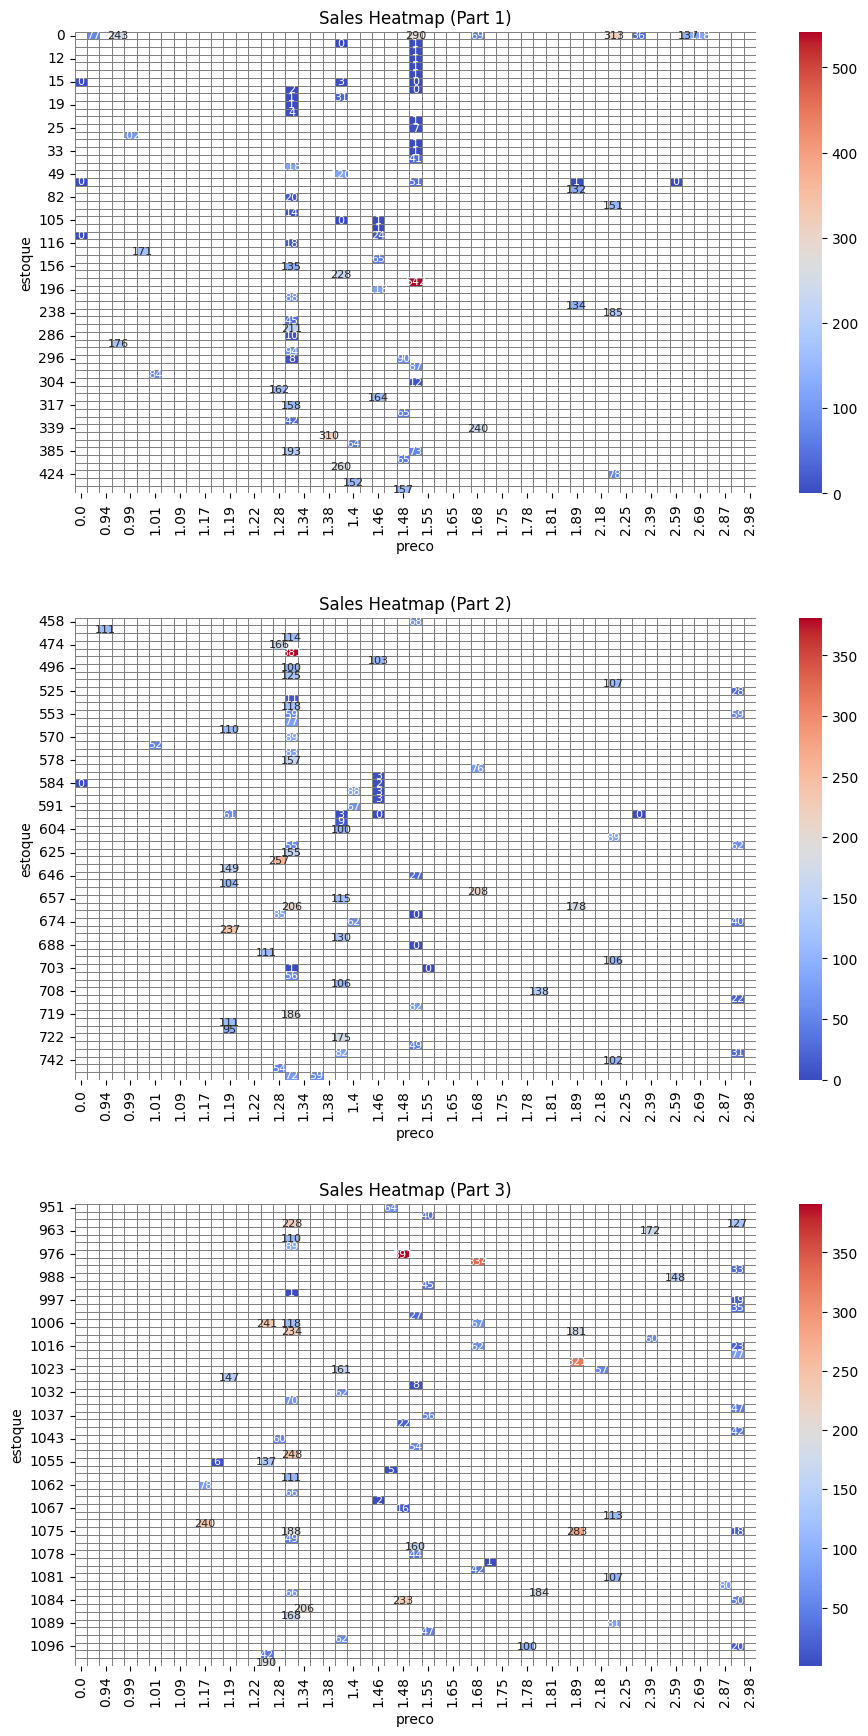

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming data is already loaded in 'data'
# Create the pivot table as before
sales_pivot = data.pivot_table(index='estoque', columns='preco', values='venda', aggfunc='sum')

# Define the ranges to split the heatmap into 3 parts based on 'estoque'
ranges = [
    (0, 60),
    (60, 120),
    (180, 240)
]

# Set up the subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 18), dpi=100)  # Create 3 subplots

# Loop through the ranges and plot each part
for i, (start, end) in enumerate(ranges):
    sns.heatmap(sales_pivot.iloc[start:end, :], annot=True, cmap='coolwarm', fmt='.0f',
                linewidths=0.5, linecolor='gray', ax=axes[i], annot_kws={"size": 8})
    axes[i].set_title(f'Sales Heatmap (Part {i+1})', fontsize=12)

# Adjust layout
plt.tight_layout(pad=3)
plt.show()


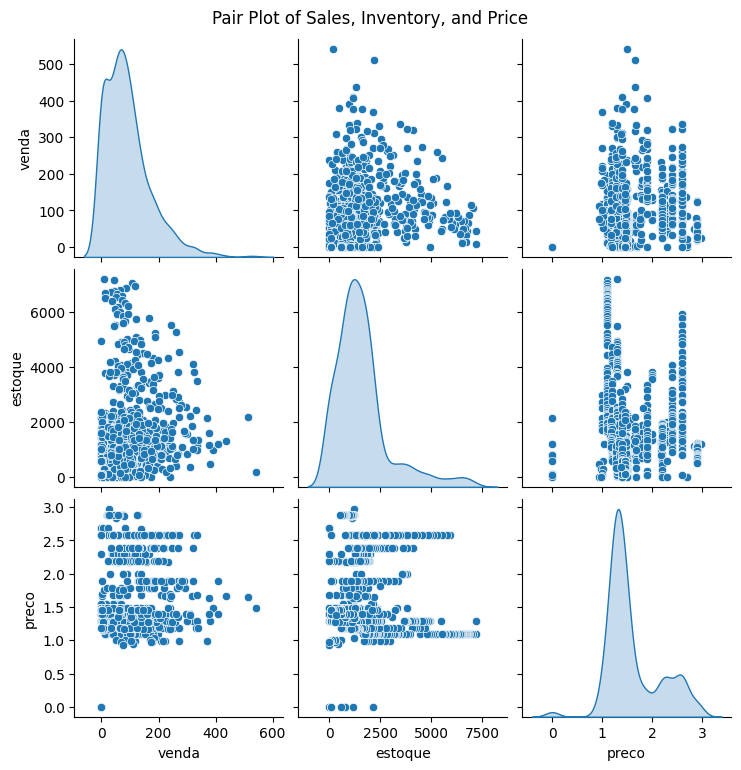

In [ ]:
# Import necessary libraries for advanced visualizations
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Pair Plot to visualize relationships between multiple variables
sns.pairplot(data[['venda', 'estoque', 'preco']], diag_kind='kde')
plt.suptitle('Pair Plot of Sales, Inventory, and Price', y=1.02)
plt.show()

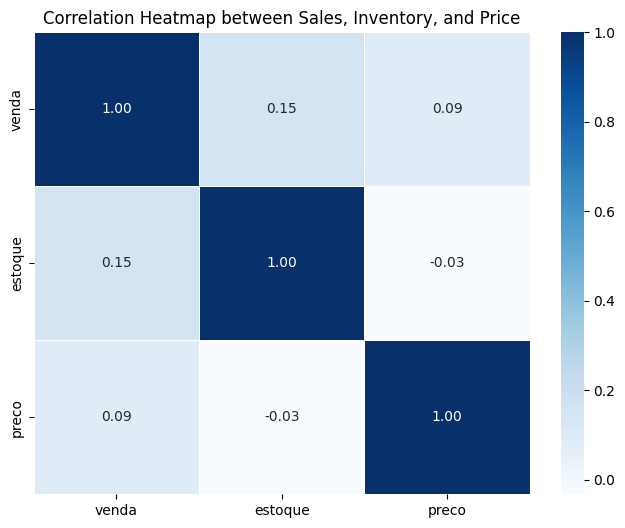

In [ ]:
# Correlation Heatmap between the features
plt.figure(figsize=(8, 6))
correlation_matrix = data[['venda', 'estoque', 'preco']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap between Sales, Inventory, and Price')
plt.show()

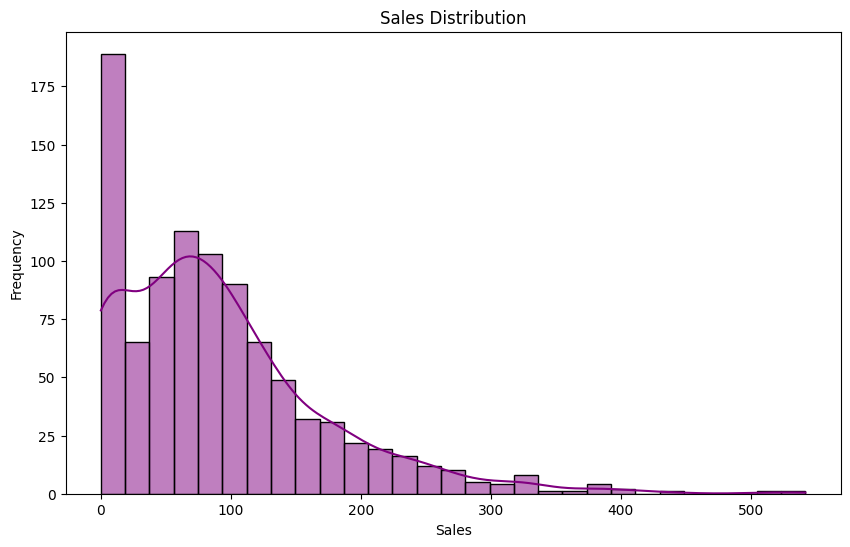

In [ ]:
# Distribution Plot of Sales
plt.figure(figsize=(10, 6))
sns.histplot(data['venda'], kde=True, color='purple')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


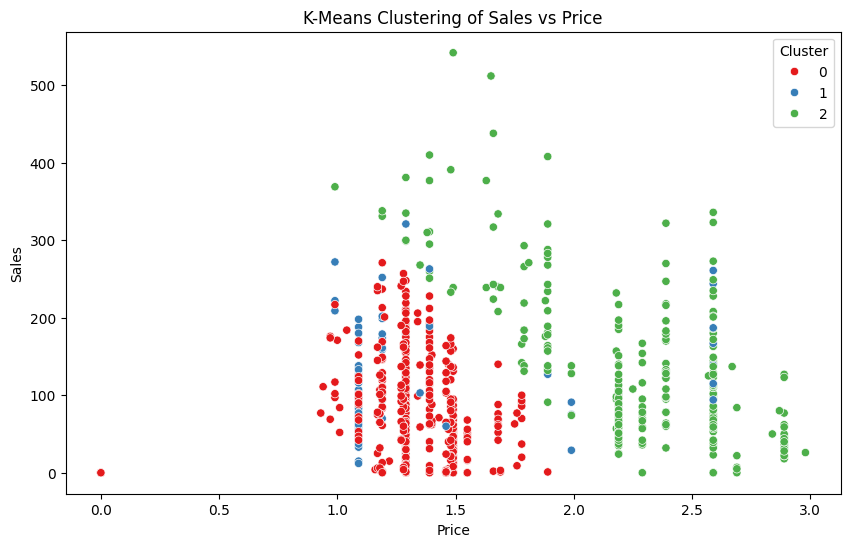

In [ ]:
# Clustering Analysis - Identifying patterns in Inventory, Price, and Sales
# Standardize the data for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['venda', 'estoque', 'preco']])

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize Clusters in 2D space using Price vs Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='preco', y='venda', hue='Cluster', data=data, palette='Set1')
plt.title('K-Means Clustering of Sales vs Price')
plt.xlabel('Price')
plt.ylabel('Sales')
plt.show()



Average Sales for each Cluster:
Cluster
0     66.896309
1    104.097087
2    136.015094
Name: venda, dtype: float64


<ipython-input-46-46c2e6e27fba>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='venda', data=data, palette='Set3')


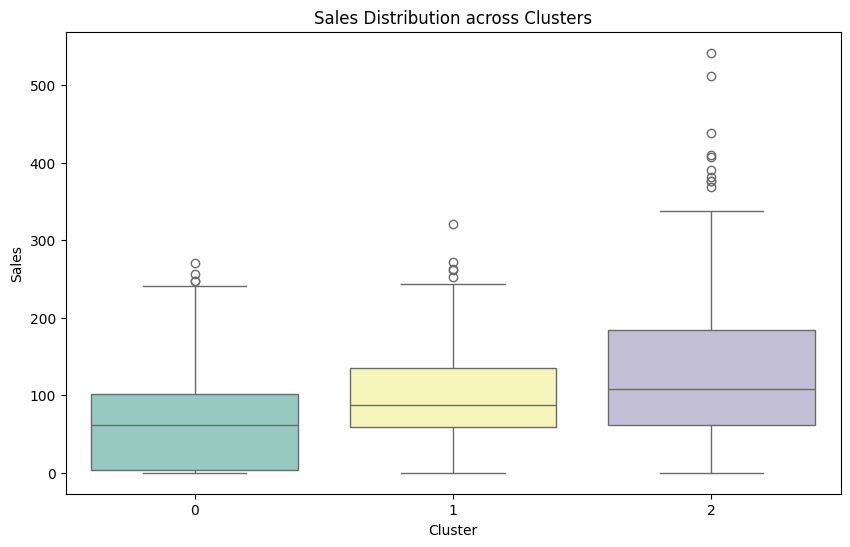

In [ ]:
# Recommendation based on Cluster Insights
cluster_sales = data.groupby('Cluster')['venda'].mean()
print("\nAverage Sales for each Cluster:")
print(cluster_sales)

# Boxplot to visualize sales distributions across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='venda', data=data, palette='Set3')
plt.title('Sales Distribution across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Sales')
plt.show()

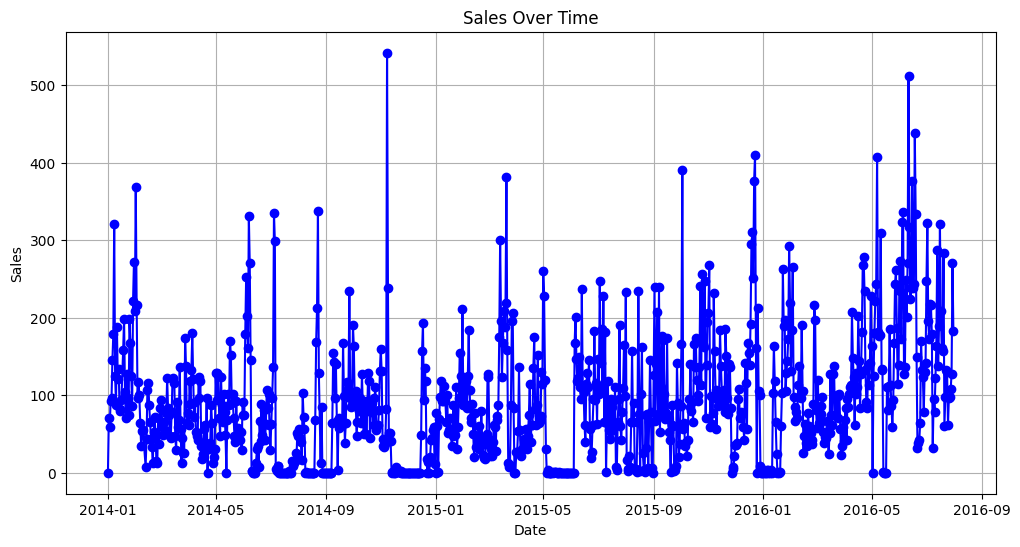

In [ ]:
 # Sales Over Time (Line Plot)
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['venda'], marker='o', linestyle='-', color='blue')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


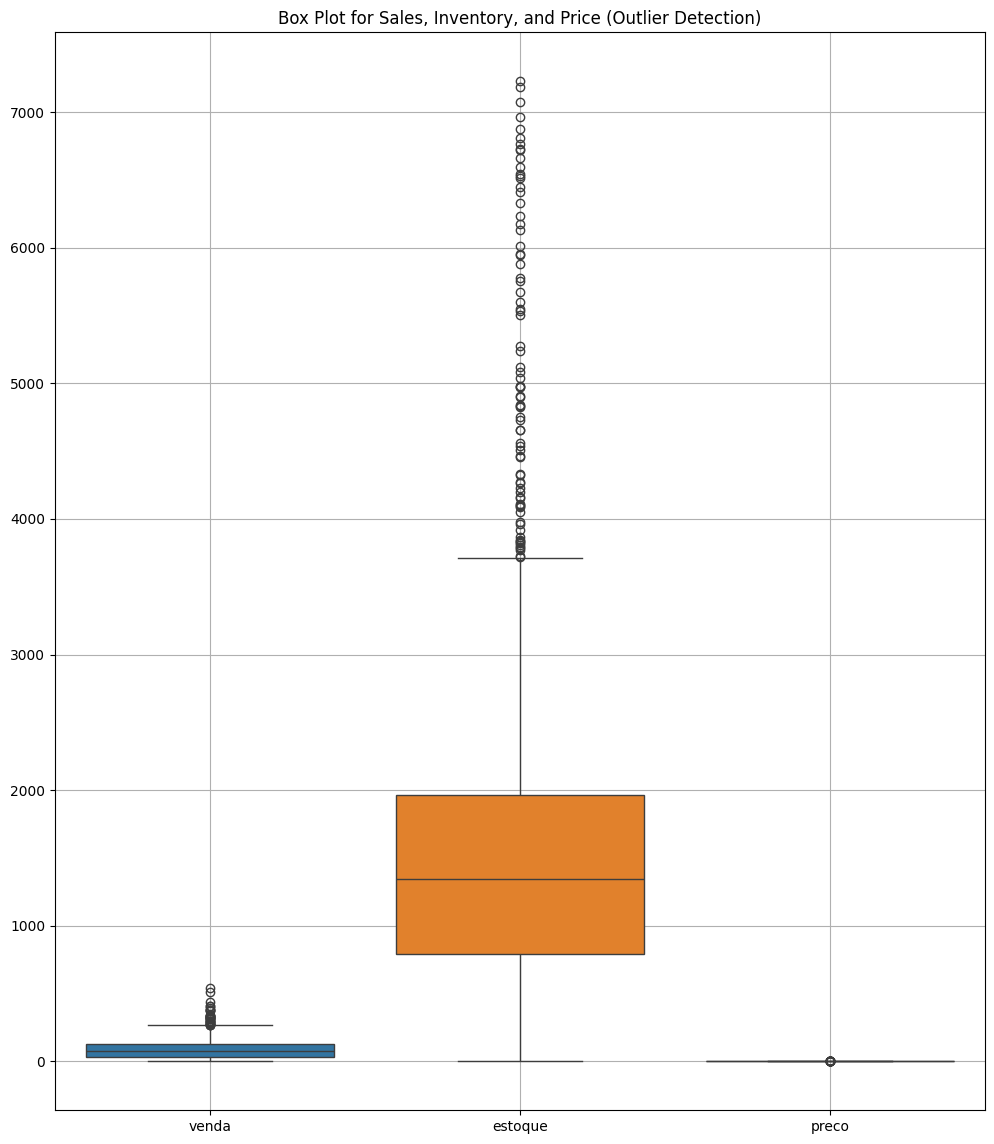

In [ ]:
# Box Plot for Outlier Detection in Sales, Inventory, and Price
plt.figure(figsize=(12, 14))
sns.boxplot(data=data[['venda', 'estoque', 'preco']])
plt.title('Box Plot for Sales, Inventory, and Price (Outlier Detection)')
plt.grid(True)
plt.show()

<ipython-input-52-d355475d79fa>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_sales.index.month, y=monthly_sales.values, palette='coolwarm')


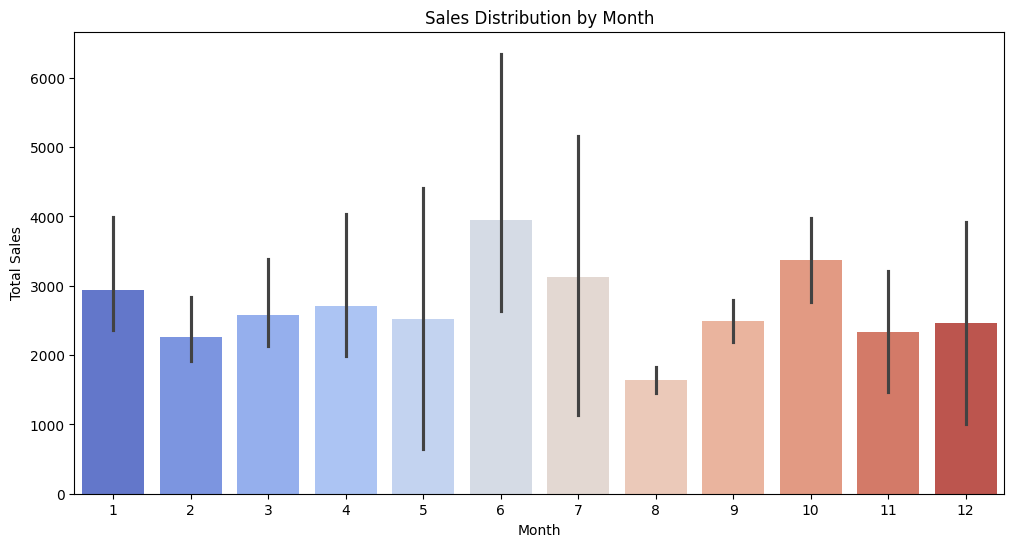

In [ ]:
# Sales Distribution by Month (Bar Plot)
monthly_sales = data.resample('M')['venda'].sum()
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_sales.index.month, y=monthly_sales.values, palette='coolwarm')
plt.title('Sales Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

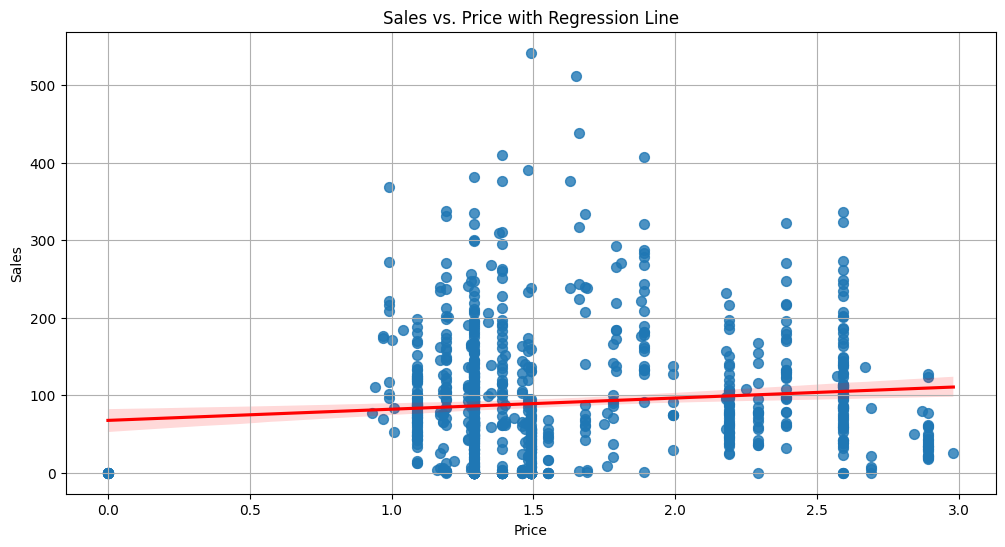

In [ ]:
# Sales vs. Price (Scatter Plot with Regression Line)
plt.figure(figsize=(12, 6))
sns.regplot(x='preco', y='venda', data=data, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Sales vs. Price with Regression Line')
plt.xlabel('Price')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

<ipython-input-55-43e4e862614f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette='viridis')


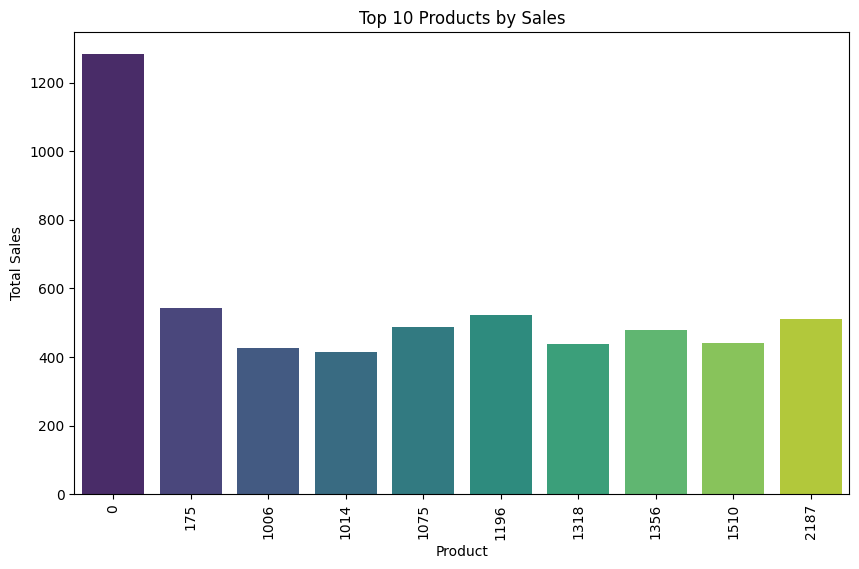

In [ ]:
# Top 10 Products by Sales (Bar Plot)
top_products = data.groupby('estoque')['venda'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.index, y=top_products.values, palette='viridis')
plt.title('Top 10 Products by Sales')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

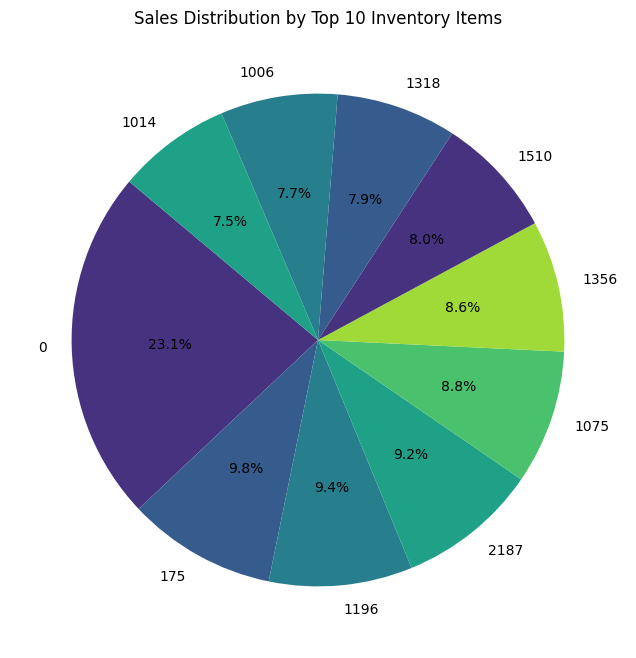

In [ ]:
# Pie Chart for Sales Distribution by Inventory
inventory_sales = data.groupby('estoque')['venda'].sum()
top_inventory = inventory_sales.nlargest(10)  # Show only top 10 inventories
plt.figure(figsize=(8, 8))
plt.pie(top_inventory.values, labels=top_inventory.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))
plt.title('Sales Distribution by Top 10 Inventory Items')
plt.show()

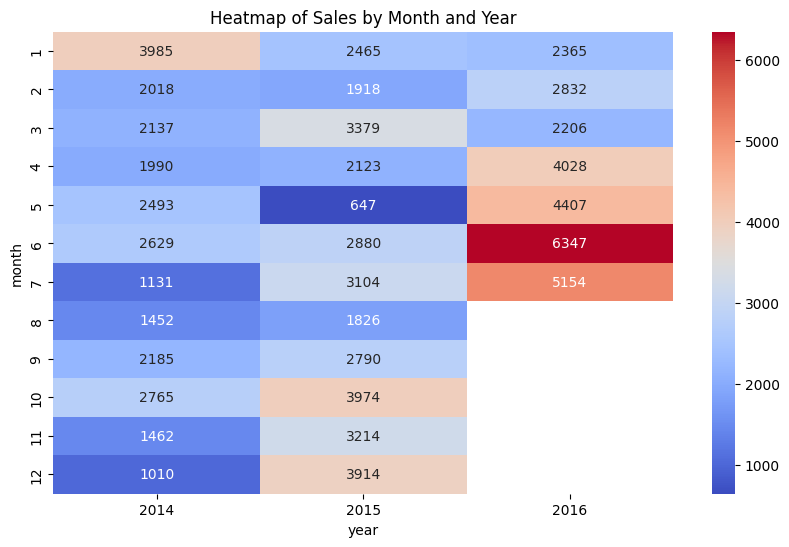

In [ ]:
# Heatmap for Month and Yearly Trends in Sales
data['month'] = data.index.month
data['year'] = data.index.year
monthly_yearly_sales = data.pivot_table(index='month', columns='year', values='venda', aggfunc='sum')
plt.figure(figsize=(10, 6))
sns.heatmap(monthly_yearly_sales, annot=True, cmap='coolwarm', fmt='.0f')
plt.title('Heatmap of Sales by Month and Year')
plt.show()

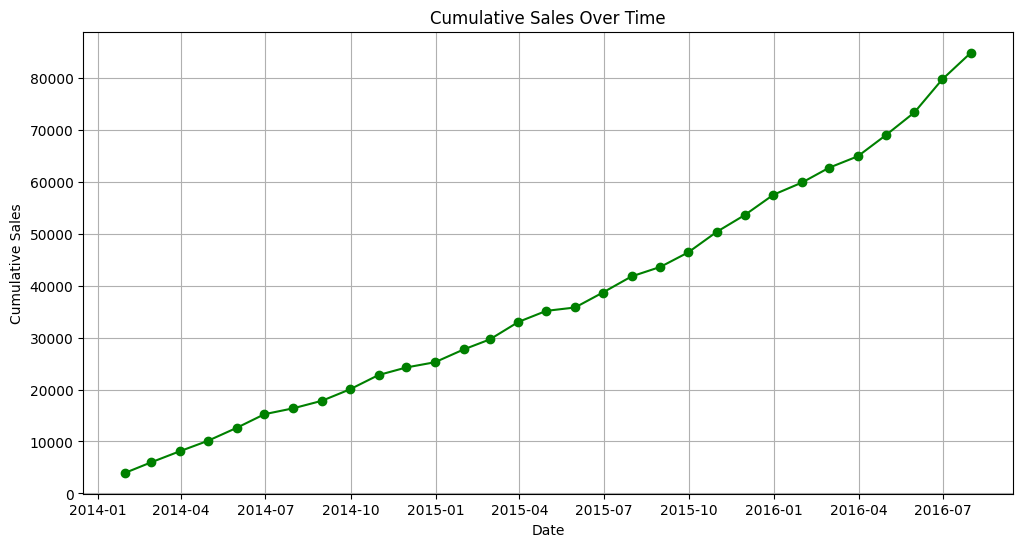

In [ ]:
# Sales Cumulative Sum (Cumulative Line Plot)
plt.figure(figsize=(12, 6))
monthly_sales_cumsum = monthly_sales.cumsum()
plt.plot(monthly_sales_cumsum.index, monthly_sales_cumsum.values, color='green', linestyle='-', marker='o')
plt.title('Cumulative Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Sales')
plt.grid(True)
plt.show()

<ipython-input-60-fa7676859efd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='preco', y='venda', data=data, palette='Set2')


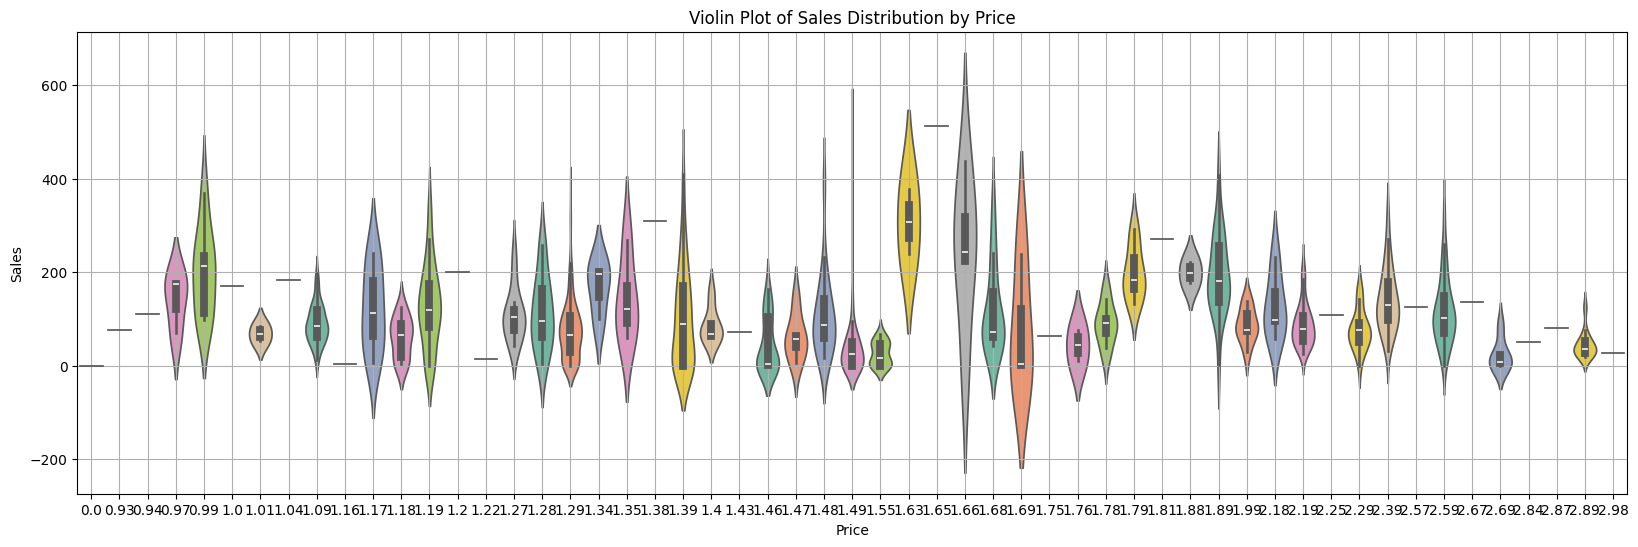

In [ ]:
# Violin Plot to Show the Distribution of Sales Across Different Price Ranges
plt.figure(figsize=(20, 6))
sns.violinplot(x='preco', y='venda', data=data, palette='Set2')
plt.title('Violin Plot of Sales Distribution by Price')
plt.xlabel('Price')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

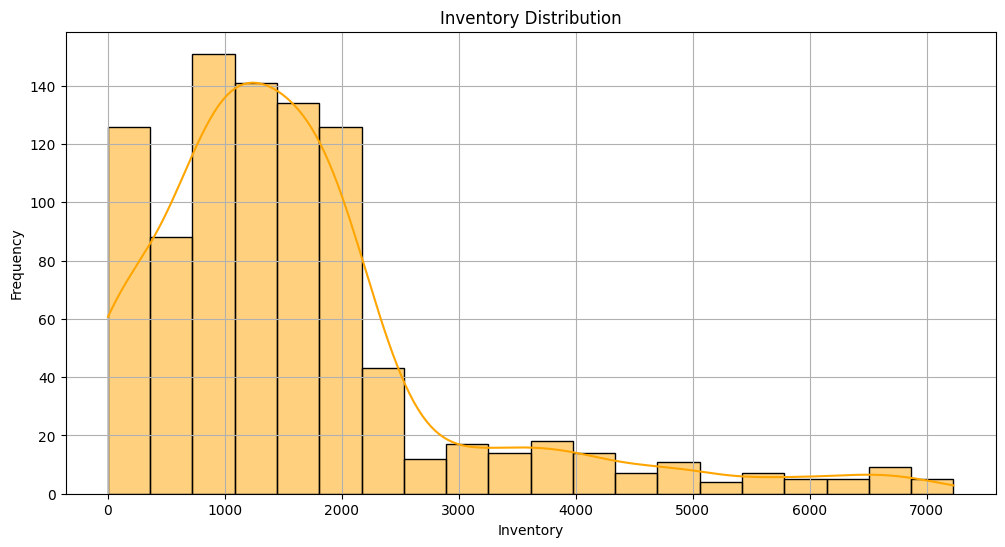

In [ ]:
# Histogram of Inventory Distribution
plt.figure(figsize=(12, 6))
sns.histplot(data['estoque'], kde=True, color='orange', bins=20)
plt.title('Inventory Distribution')
plt.xlabel('Inventory')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
# Recommendations based on EDA
# recommendation: Identify top-performing inventories and prices
top_inventories = inventory_sales.sort_values(ascending=False).head(3)
print("\nTop Performing Inventories:")
print(top_inventories)

top_prices = price_sales.sort_values(ascending=False).head(3)
print("\nTop Performing Prices:")
print(top_prices)


Top Performing Inventories:
estoque
0       1283
175      542
1196     522
Name: venda, dtype: int64

Top Performing Prices:
preco
1.29    19066
2.59     8403
1.09     5721
Name: venda, dtype: int64
